# User analysis based on music preferences #
### Import libraries, setup environment ###

In [1]:
import pandas as pd
import numpy as np
from collections import Counter
from sklearn.manifold import TSNE
from sklearn.preprocessing import OneHotEncoder,LabelEncoder
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

pd.set_option('display.max_columns', 150)
path='C:\\usersCode\\MScDataScience\\Multimodal analysis\\Preprocessing\\'

#### Read input user data ####

In [2]:
df = pd.read_excel(path+'spotify_metadata_playlist_clu.xlsx')
df.tail()

,acousticness,activity,age,artist_name,danceability,energy,gender,id,instrumentalness,liveness,location,loudness,mood,period,popularity,release_date,song_name,speechiness,tempo,user_id,valence,age_group,clusters_kmeans,clusters_kmodes,clusters_hdbscan,clusters_dbscan
698,0.09830,commuting,40,Deep Purple,0.632,0.586,male,5SAUIWdZ04OxYfJFDchC7S,0.581000,0.0535,outdoor,-11.333,excitement,midday,63,1972-03-25,Smoke on the Water,0.0284,114.243,9,0.890,41-50,3,6,1,-1
699,0.07900,commuting,40,The Clash,0.742,0.833,male,39shmbIHICJ2Wxnk1fPSdz,0.000000,0.3840,outdoor,-6.463,excitement,midday,77,1982,Should I Stay or Should I Go - Remastered,0.1150,113.375,9,0.816,41-50,3,6,1,-1
700,0.00705,commuting,40,Motörhead,0.448,0.936,male,1s0koYJ8UkZstIYYGboZa3,0.245000,0.1280,outdoor,-6.300,excitement,midday,29,1992-07-28,You Better Run,0.0589,135.135,9,0.536,41-50,3,6,1,-1
701,0.00377,commuting,40,Motörhead,0.660,0.778,male,7BwYSuWTyfcG3vtp1SnP7n,0.000856,0.3730,outdoor,-6.163,excitement,midday,44,1979-03-24,Louie Louie,0.0583,123.205,9,0.758,41-50,3,6,1,-1
702,0.00014,commuting,40,The Gone Jackals,0.305,0.882,male,2u2hIyLXxO06AudM88TmgF,0.249000,0.3880,outdoor,-13.521,excitement,midday,31,1995,Legacy,0.0706,125.519,9,0.477,41-50,3,6,1,-1


Profiling User 1
Number of items: 30
Cluster characteristics of user:1: Clusters: 6 Mood:contentment, Location:home, Activity:working, When:evening
Spotify characteristics: Accousticness:0.000841-0.755, Danceability:0.351-0.805, Energy:0.337-0.902, Loudness:-13.692--3.017, Tempo:67.026-188.021, Valence:0.0822-0.909, Instrumentalness:0.0-0.874


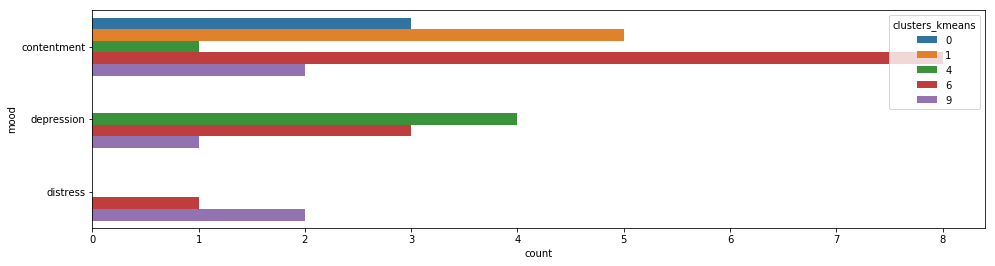

Profiling User 2
Number of items: 6
Cluster characteristics of user:2: Clusters: 2 Mood:contentment, Location:home, Activity:studying, When:evening
Spotify characteristics: Accousticness:0.00109-0.995, Danceability:0.137-0.84, Energy:0.0272-0.844, Loudness:-29.648--4.352, Tempo:65.568-170.358, Valence:0.0368-0.37, Instrumentalness:0.000684-0.939


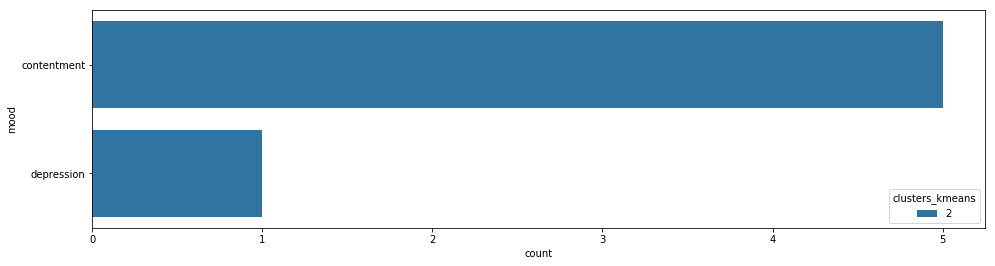

Profiling User 3
Number of items: 2
Cluster characteristics of user:3: Clusters: 2 Mood:contentment, Location:outdoor, Activity:amusing, When:night
Spotify characteristics: Accousticness:0.0622-0.778, Danceability:0.606-0.776, Energy:0.294-0.78, Loudness:-11.836--4.374, Tempo:76.083-124.949, Valence:0.192-0.666, Instrumentalness:0.0-0.162


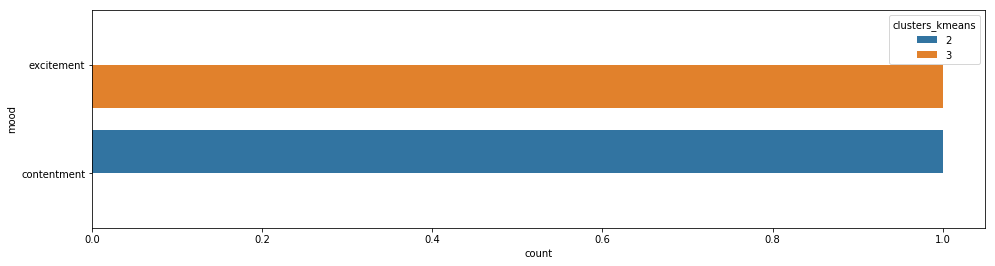

Profiling User 4
Number of items: 1
Cluster characteristics of user:4: Clusters: 9 Mood:excitement, Location:work, Activity:working, When:afternoon
Spotify characteristics: Accousticness:0.00678-0.00678, Danceability:0.853-0.853, Energy:0.541-0.541, Loudness:-10.229--10.229, Tempo:124.001-124.001, Valence:0.62-0.62, Instrumentalness:0.000224-0.000224


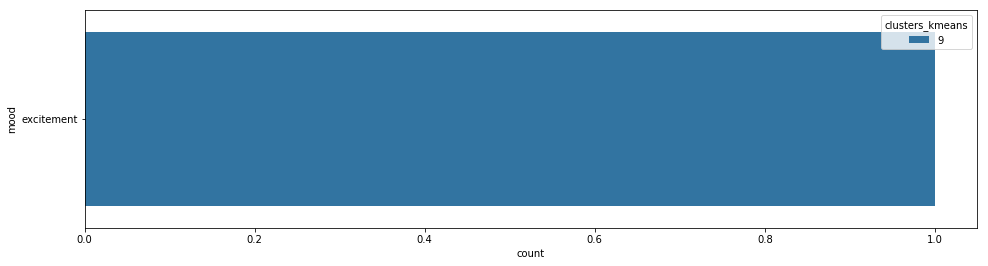

Profiling User 5
Number of items: 67
Cluster characteristics of user:5: Clusters: 8 Mood:contentment, Location:home, Activity:amusing, When:night
Spotify characteristics: Accousticness:0.00286-0.94, Danceability:0.275-0.855, Energy:0.0959-0.968, Loudness:-20.338--3.112, Tempo:75.836-189.785, Valence:0.136-0.963, Instrumentalness:0.0-0.865


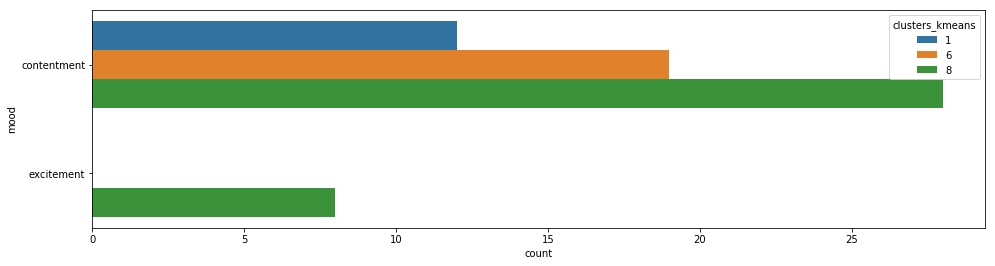

Profiling User 6
Number of items: 80
Cluster characteristics of user:6: Clusters: 7 Mood:contentment, Location:work, Activity:working, When:midday
Spotify characteristics: Accousticness:1.15e-05-0.985, Danceability:0.219-0.854, Energy:0.00894-0.975, Loudness:-25.102--3.9, Tempo:56.3-208.571, Valence:0.0547-0.91, Instrumentalness:0.0-0.942


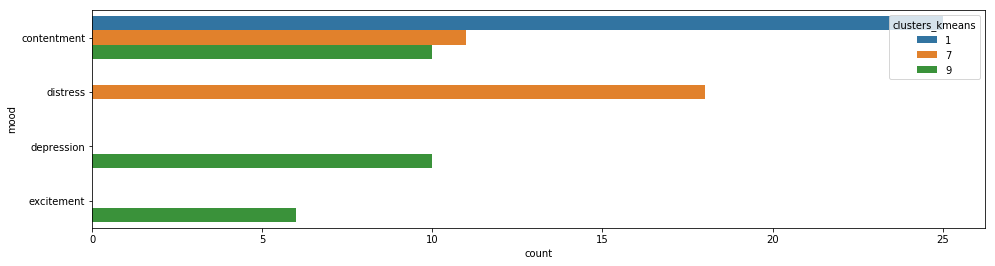

Profiling User 7
Number of items: 43
Cluster characteristics of user:7: Clusters: 5 Mood:contentment, Location:work, Activity:commuting, When:morning
Spotify characteristics: Accousticness:4.52e-05-0.963, Danceability:0.307-0.952, Energy:0.147-0.939, Loudness:-18.097--2.214, Tempo:75.454-199.373, Valence:0.0694-0.965, Instrumentalness:0.0-0.942


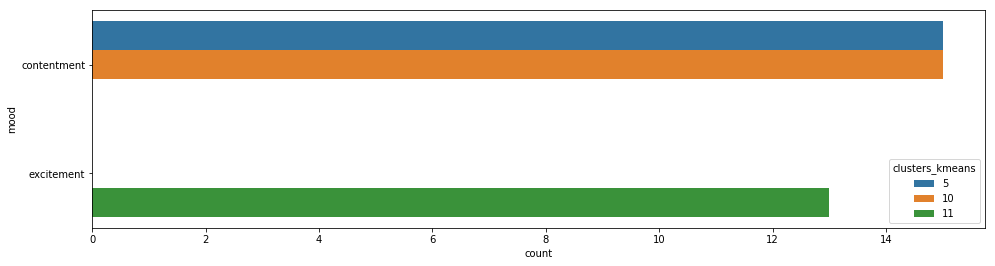

Profiling User 8
Number of items: 37
Cluster characteristics of user:8: Clusters: 1 Mood:contentment, Location:work, Activity:working, When:morning
Spotify characteristics: Accousticness:1.95e-05-0.995, Danceability:0.112-0.837, Energy:0.0559-0.962, Loudness:-25.377--2.597, Tempo:72.81-197.705, Valence:0.0348-0.952, Instrumentalness:0.0-0.961


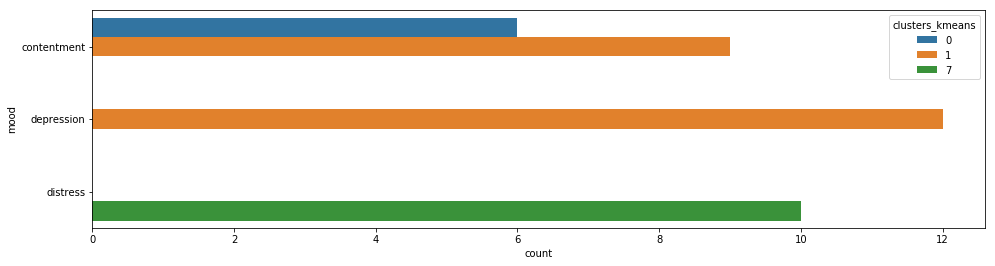

Profiling User 9
Number of items: 56
Cluster characteristics of user:9: Clusters: 4 Mood:contentment, Location:home, Activity:amusing, When:morning
Spotify characteristics: Accousticness:5.36e-06-0.938, Danceability:0.112-0.794, Energy:0.0686-0.983, Loudness:-23.208--2.752, Tempo:77.865-200.024, Valence:0.139-0.954, Instrumentalness:0.0-0.962


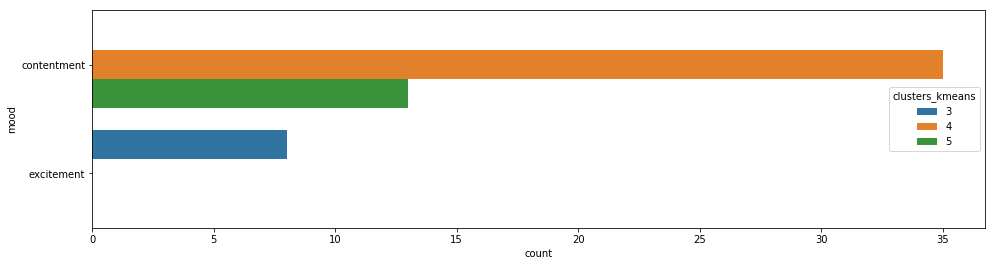

Profiling User 10
Number of items: 15
Cluster characteristics of user:10: Clusters: 1 Mood:contentment, Location:work, Activity:working, When:morning
Spotify characteristics: Accousticness:0.000453-0.963, Danceability:0.346-0.798, Energy:0.201-0.913, Loudness:-13.156--2.578, Tempo:72.637-174.53, Valence:0.102-0.89, Instrumentalness:0.0-0.645


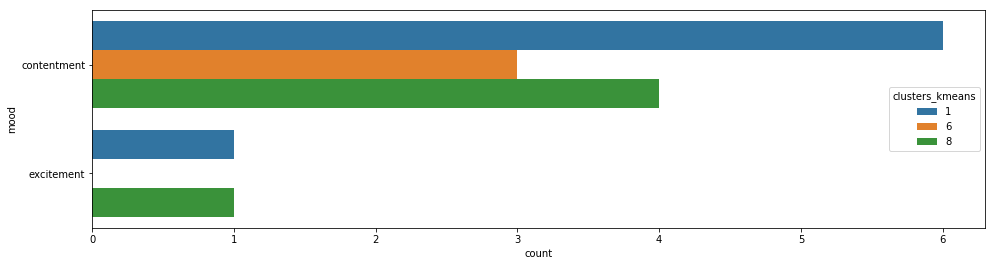

Profiling User 11
Number of items: 48
Cluster characteristics of user:11: Clusters: 3 Mood:excitement, Location:outdoor, Activity:working, When:midday
Spotify characteristics: Accousticness:2.77e-06-0.963, Danceability:0.153-0.807, Energy:0.0686-0.961, Loudness:-23.208--2.379, Tempo:64.223-176.445, Valence:0.163-0.952, Instrumentalness:0.0-0.962


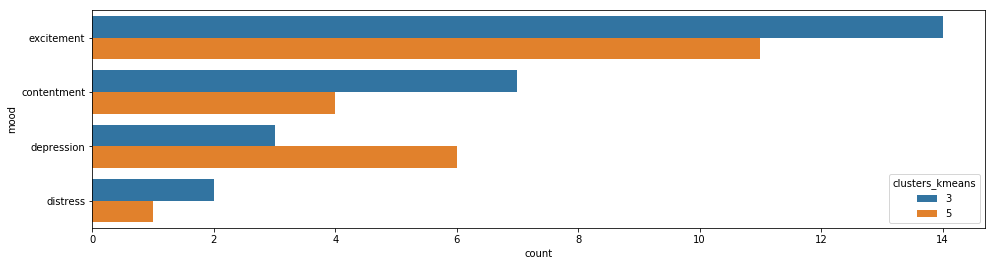

Profiling User 12
Number of items: 26
Cluster characteristics of user:12: Clusters: 4 Mood:contentment, Location:home, Activity:amusing, When:afternoon
Spotify characteristics: Accousticness:2.06e-05-0.741, Danceability:0.336-0.856, Energy:0.383-0.99, Loudness:-14.193--1.077, Tempo:79.974-170.036, Valence:0.0928-0.969, Instrumentalness:0.0-0.891


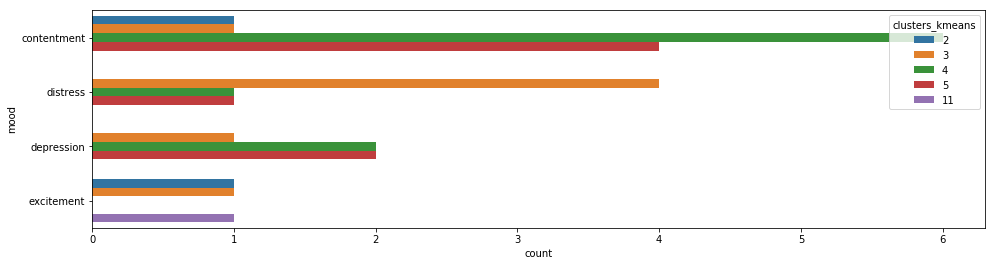

Profiling User 13
Number of items: 25
Cluster characteristics of user:13: Clusters: 5 Mood:excitement, Location:work, Activity:working, When:morning
Spotify characteristics: Accousticness:0.00671-0.925, Danceability:0.252-0.933, Energy:0.216-0.909, Loudness:-13.551--3.017, Tempo:80.609-182.957, Valence:0.166-0.876, Instrumentalness:0.0-0.772


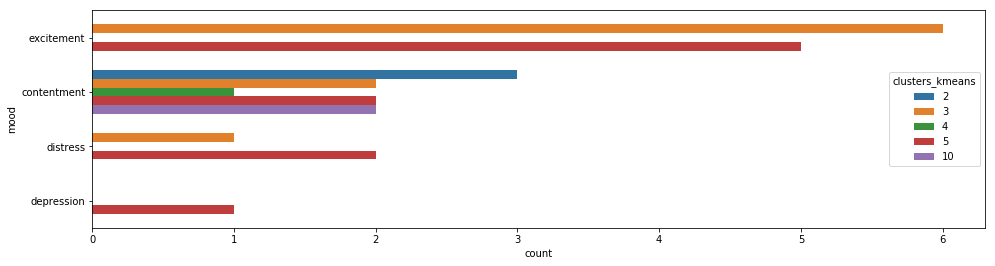

Profiling User 14
Number of items: 13
Cluster characteristics of user:14: Clusters: 11 Mood:excitement, Location:home, Activity:amusing, When:night
Spotify characteristics: Accousticness:0.181-0.692, Danceability:0.53-0.843, Energy:0.338-0.687, Loudness:-10.691--6.4, Tempo:98.027-173.737, Valence:0.111-0.803, Instrumentalness:0.0-0.876


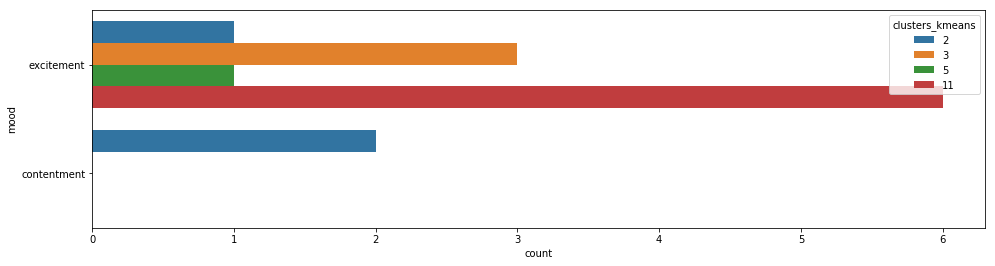

Profiling User 15
Number of items: 11
Cluster characteristics of user:15: Clusters: 2 Mood:depression, Location:home, Activity:studying, When:night
Spotify characteristics: Accousticness:0.000976-0.956, Danceability:0.147-0.825, Energy:0.0954-0.871, Loudness:-29.213--2.959, Tempo:73.418-155.007, Valence:0.0269-0.836, Instrumentalness:0.0-0.943


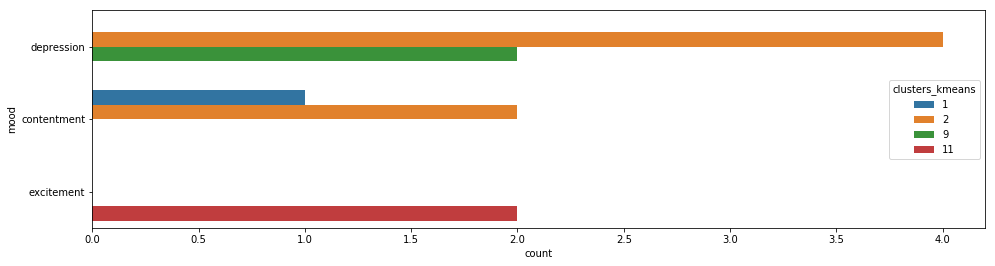

Profiling User 16
Number of items: 75
Cluster characteristics of user:16: Clusters: 0 Mood:contentment, Location:home, Activity:studying, When:morning
Spotify characteristics: Accousticness:4.52e-05-0.963, Danceability:0.222-0.826, Energy:0.201-0.967, Loudness:-14.192--2.578, Tempo:72.637-193.948, Valence:0.0948-0.923, Instrumentalness:0.0-0.891


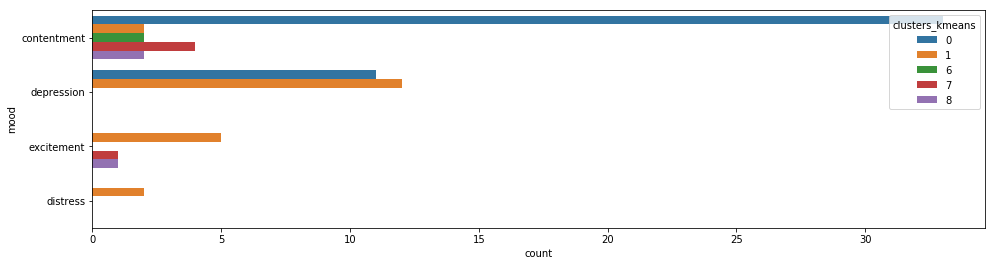

,acousticness,activity,age,artist_name,danceability,energy,gender,id,instrumentalness,liveness,location,loudness,mood,period,popularity,release_date,song_name,speechiness,tempo,user_id,valence,age_group,clusters_kmeans,clusters_kmodes,clusters_hdbscan,clusters_dbscan
count,75.000000,75,75.0,75,75.000000,75.000000,75,75,75.000000,75.000000,75,75.000000,75,75,75.000000,75,75,75.000000,75.000000,75.0,75.000000,75,75.000000,75.000000,75.000000,75.000000
unique,NaN,3,NaN,40,NaN,NaN,1,57,NaN,NaN,3,NaN,4,4,NaN,44,57,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN
top,NaN,studying,NaN,Imagine Dragons,NaN,NaN,female,5Hv1QAbRWrUSUHaT0CmnMS,NaN,NaN,home,NaN,contentment,morning,NaN,2017-06-23,Into the Night (feat. Chad Kroeger),NaN,NaN,NaN,NaN,31-40,NaN,NaN,NaN,NaN
freq,NaN,53,NaN,6,NaN,NaN,75,3,NaN,NaN,43,NaN,43,44,NaN,6,3,NaN,NaN,NaN,NaN,75,NaN,NaN,NaN,NaN
mean,0.178910,NaN,33.0,NaN,0.562053,0.697267,NaN,NaN,0.075417,0.182136,NaN,-7.393653,NaN,NaN,56.800000,NaN,NaN,0.059793,118.447960,16.0,0.512652,NaN,1.226667,6.946667,2.760000,0.040000
std,0.227344,NaN,0.0,NaN,0.138969,0.170386,NaN,NaN,0.181475,0.141902,NaN,2.931605,NaN,NaN,19.282396,NaN,NaN,0.046163,26.541111,0.0,0.225009,NaN,2.374261,2.784578,4.049825,1.408852
min,0.000045,NaN,33.0,NaN,0.222000,0.201000,NaN,NaN,0.000000,0.027200,NaN,-14.192000,NaN,NaN,0.000000,NaN,NaN,0.025400,72.637000,16.0,0.094800,NaN,0.000000,1.000000,-1.000000,-1.000000
25%,0.005320,NaN,33.0,NaN,0.444000,0.631500,NaN,NaN,0.000000,0.091750,NaN,-9.839000,NaN,NaN,46.500000,NaN,NaN,0.031850,100.025500,16.0,0.338000,NaN,0.000000,4.000000,-1.000000,-1.000000
50%,0.080100,NaN,33.0,NaN,0.569000,0.704000,NaN,NaN,0.000734,0.127000,NaN,-7.283000,NaN,NaN,62.000000,NaN,NaN,0.044800,114.243000,16.0,0.466000,NaN,0.000000,9.000000,-1.000000,-1.000000
75%,0.294000,NaN,33.0,NaN,0.671000,0.844500,NaN,NaN,0.018150,0.244000,NaN,-4.850500,NaN,NaN,70.000000,NaN,NaN,0.056400,137.863000,16.0,0.666000,NaN,1.000000,9.000000,6.000000,1.000000


In [4]:
n_users=17
cluster_method = 'clusters_kmeans'

for user in range(1,n_users):
    df_filtered = df[df['user_id'] == user]
    length = len(df_filtered)
    
    print('Profiling User {}'.format(user) )
    print('Number of items:', length)
    print('Cluster characteristics of user:{}: Clusters: {} Mood:{}, Location:{}, Activity:{}, When:{}'.format(user, 
                                                                                        df_filtered[cluster_method].value_counts().sort_values(ascending=False).idxmax(),
                                                                                        df_filtered['mood'].value_counts().sort_values(ascending=False).idxmax(),
                                                                                        df_filtered['location'].value_counts().sort_values(ascending=False).idxmax(),
                                                                                        df_filtered['activity'].value_counts().sort_values(ascending=False).idxmax(),
                                                                                        df_filtered['period'].value_counts().sort_values(ascending=False).idxmax()
                                                                                                                    ))

    print('Spotify characteristics: Accousticness:{}, Danceability:{}, Energy:{}, Loudness:{}, Tempo:{}, Valence:{}, Instrumentalness:{}'.format(
                                                                                        str(df_filtered['acousticness'].min())+'-'+str(df_filtered['acousticness'].max()), 
                                                                                        str(df_filtered['danceability'].min())+'-'+str(df_filtered['danceability'].max()), 
                                                                                        str(df_filtered['energy'].min())+'-'+str(df_filtered['energy'].max()), 
                                                                                        str(df_filtered['loudness'].min())+'-'+str(df_filtered['loudness'].max()),
                                                                                        str(df_filtered['tempo'].min())+'-'+str(df_filtered['tempo'].max()), 
                                                                                        str(df_filtered['valence'].min())+'-'+str(df_filtered['valence'].max()), 
                                                                                        str(df_filtered['instrumentalness'].min())+'-'+str(df_filtered['instrumentalness'].max())
                                                                                                                    ))

    
    plt.figure(figsize=(16,4))
    sns.countplot(y='mood', data=df_filtered, hue=cluster_method, order = df_filtered.mood.value_counts().index )
    plt.show()
    
df_filtered.describe(include='all')



#sns.pairplot(df_filtered)